# 6.Decision Trees and Ensemble Learning

## 6.1 Credit risk scoring project

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

## 6.2 Data cleaning and prepration
  * Download the dataset
  * Re-encode the categorical variables
  * Doing the train/validation/test split

In [2]:
df = pd.read_csv('./dataset/CreditScoring.csv')

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')


In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [7]:
status_values = {
    1:'ok',
    2:'default',
    0:'unknown'
}

df.status = df.status.map(status_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [10]:


marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)



In [11]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [12]:


job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)



In [13]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [14]:
df.income.max()

np.int64(99999999)

In [15]:
for c in ['income','assets','debt']:

    df[c] =  df[c].replace(to_replace=99999999,value =np.nan)

In [16]:
df.income.max()

np.float64(959.0)

In [17]:
df.status.value_counts()

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

see here we have a unknown column and we dont want it

In [18]:
df = df[ df.status !='unknown'].reset_index(drop=True)

now the data is ready and split the data for the training

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_full_train,df_test = train_test_split(df,test_size = 0.2,random_state = 11)
df_train,df_val = train_test_split(df_full_train,test_size = 0.25,random_state = 11)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [22]:
y_train =  (df_train.status == 'default').astype(int)
y_val =  (df_val.status == 'default').astype(int)
y_test =  (df_test.status == 'default').astype(int)

In [23]:
del df_train['status']
del df_val['status']
del df_test['status']


In [24]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## 6.3 Decision Trees
  * How a decision tree look like
  * Training a decision tree
  * Overfitting
  * Controlling the size of a tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score


In [26]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [27]:
dv=DictVectorizer(sparse=False)
X_train =dv.fit_transform(train_dicts)

In [28]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [29]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
val_dict = df_val.to_dict(orient='records')


In [31]:
X_val = dv.transform(val_dict)

In [32]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.7376244217868301

In [33]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)



0.7761016984958594

we have a function we can use to see what condition did the model taken for the tree

In [34]:
from sklearn.tree import export_text

In [35]:
print(export_text(dt,feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



## 6.4 Decision tree learning algorithm
  * Find the best split for one column
  * Find the best split for entire dataset
  * Stopping criteria
  * Decision tree learning alogorithm

In [37]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)

    y_pred = dt.predict_proba(X_val)[:,1]

    auc = roc_auc_score(y_val,y_pred)
    print('%4s -> %.3f'%(d,auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.738
   4 -> 0.759
   5 -> 0.763
   6 -> 0.745
  10 -> 0.703
  15 -> 0.665
  20 -> 0.658
None -> 0.648


In [59]:
scores =[]
for d in[4,5,6]:
    for s in [1,2,5,10,15,20,100,500]:
         dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
         dt.fit(X_train,y_train)

         y_pred = dt.predict_proba(X_val)[:,1]
         scores.append((d,s,auc))
         auc = roc_auc_score(y_val,y_pred)
         print('(%4s,%4s) -> %.3f'%(d,s,auc))


(   4,   1) -> 0.759
(   4,   2) -> 0.759
(   4,   5) -> 0.759
(   4,  10) -> 0.759
(   4,  15) -> 0.762
(   4,  20) -> 0.759
(   4, 100) -> 0.754
(   4, 500) -> 0.679
(   5,   1) -> 0.763
(   5,   2) -> 0.763
(   5,   5) -> 0.764
(   5,  10) -> 0.759
(   5,  15) -> 0.769
(   5,  20) -> 0.772
(   5, 100) -> 0.761
(   5, 500) -> 0.679
(   6,   1) -> 0.758
(   6,   2) -> 0.760
(   6,   5) -> 0.754
(   6,  10) -> 0.775
(   6,  15) -> 0.783
(   6,  20) -> 0.772
(   6, 100) -> 0.774
(   6, 500) -> 0.679


In [60]:
column = ['max_depth','min_sample_leafs','auc']
df_scores = pd.DataFrame(scores,columns=column)

In [61]:
df_scores.head()

,max_depth,min_sample_leafs,auc
0,4,1,0.678786
1,4,2,0.759424
2,4,5,0.759424
3,4,10,0.759424
4,4,15,0.759424


In [62]:
df_scores.sort_values(by='auc',ascending=False)

,max_depth,min_sample_leafs,auc
21,6,20,0.782661
20,6,15,0.775075
23,6,500,0.774418
22,6,100,0.772126
14,5,100,0.771981
13,5,20,0.769151
11,5,10,0.764298
9,5,2,0.763493
10,5,5,0.763051
5,4,20,0.761837


In [63]:
df_scores_pivot = df_scores.pivot(index='min_sample_leafs',columns='max_depth',values='auc')
df_scores_pivot.round(3)

max_depth,4,5,6
min_sample_leafs,,,
1,0.679,0.679,0.679
2,0.759,0.763,0.758
5,0.759,0.763,0.760
10,0.759,0.764,0.754
15,0.759,0.759,0.775
20,0.762,0.769,0.783
100,0.759,0.772,0.772
500,0.754,0.761,0.774


let plot the df in heat map

<Axes: xlabel='max_depth', ylabel='min_sample_leafs'>

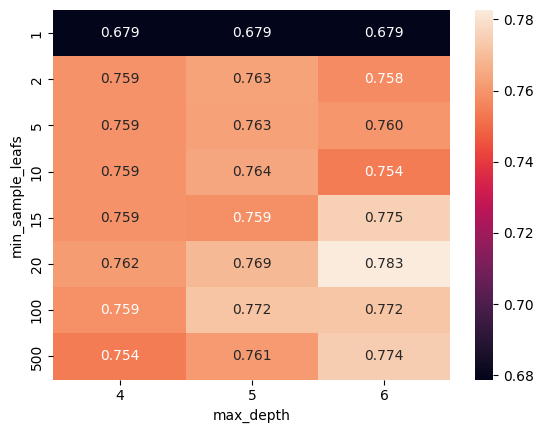

In [64]:
sns.heatmap(df_scores_pivot,annot=True,fmt='.3f')

now from the above data make the final desition tree

In [66]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=20)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [67]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)


0.7724231672761618

## 6.6 Ensemble and Random forest
  * board of experts
  * Ensembling models
  * Random forest - ensembling descision trees
  * Tuning Random forest

In [68]:
from sklearn.ensemble import RandomForestClassifier


In [166]:
rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(X_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred=rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.7754201884187837

In [181]:
scores=[]
for n in range(10,200,10):
    rf = RandomForestClassifier(n_estimators=n,random_state=1)
    rf.fit(X_train,y_train)

    y_pred=rf.predict_proba(X_val)[:,1]
    auc= roc_auc_score(y_val,y_pred)    
    scores.append((n,auc))

In [182]:
df_scores = pd.DataFrame(scores,columns=['n_estimators','auc'])
df_scores

,n_estimators,auc
0,10,0.775420
1,20,0.802336
2,30,0.814097
3,40,0.814384
4,50,0.815822
5,60,0.815278
6,70,0.816116
7,80,0.815268
8,90,0.815795
9,100,0.816703


In [184]:
df_scores.sort_values('auc',ascending=False)

,n_estimators,auc
12,130,0.817478
18,190,0.817409
13,140,0.817394
15,160,0.817315
11,120,0.817157
16,170,0.817064
17,180,0.816858
10,110,0.816719
9,100,0.816703
14,150,0.816667


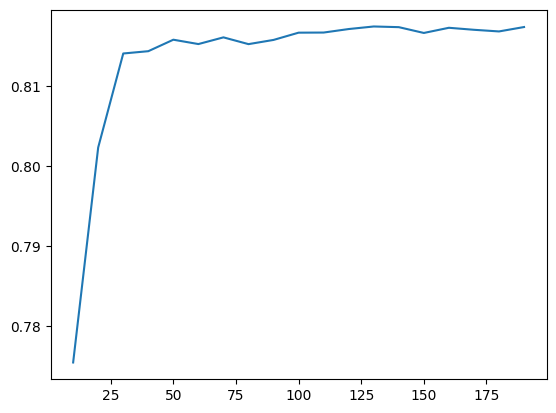

In [190]:
plt.plot(df_scores.n_estimators,df_scores.auc)

after the 50 estimator the model accuracy doesn't change much

In [195]:
scores=[]
for d in [5,10,15]:
 for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n,max_depth=d,random_state=1)
    rf.fit(X_train,y_train)

    y_pred=rf.predict_proba(X_val)[:,1]
    auc= roc_auc_score(y_val,y_pred)    
    scores.append((n,d,auc))

In [200]:
column=['n_estimators','max_depth','auc']
df_scores = pd.DataFrame(scores,columns=column)
df_scores.head()

,n_estimators,max_depth,auc
0,10,5,0.786497
1,20,5,0.796493
2,30,5,0.798857
3,40,5,0.798098
4,50,5,0.798188


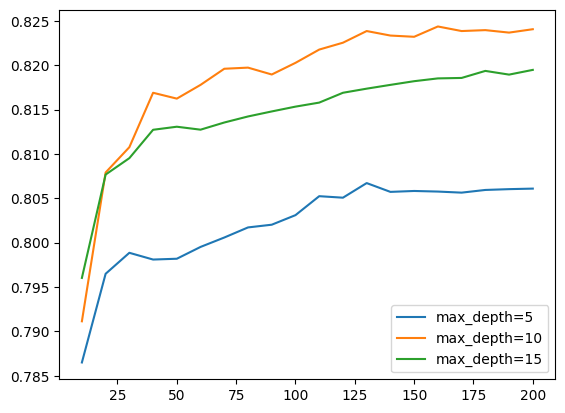

In [204]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators,df_subset.auc,label='max_depth=%d'%d)
plt.legend()

now from the above graph we get the bes max_depth is 10
and we need the find the min_samples_leaf in the same way

In [207]:
max_depth = 10

In [218]:
scores=[]
for s in [1,3,5,10,15]:
 for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n,max_depth=max_depth,min_samples_leaf=s,random_state=1,n_jobs=-1)
    rf.fit(X_train,y_train)

    y_pred=rf.predict_proba(X_val)[:,1]
    auc= roc_auc_score(y_val,y_pred)    
    scores.append((n,s,auc))

In [211]:
column=['n_estimators','min_samples_leaf','auc']
df_scores = pd.DataFrame(scores,columns=column)
df_scores.head()

,n_estimators,min_samples_leaf,auc
0,10,1,0.791138
1,20,1,0.807909
2,30,1,0.810761
3,40,1,0.816894
4,50,1,0.816234


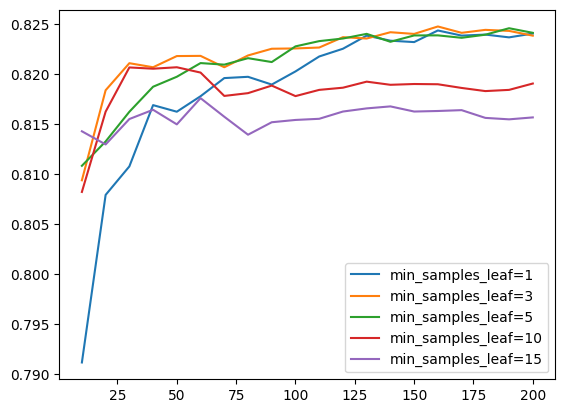

In [213]:
for s in [1,3,5,10,15]:
    df_subset = df_scores[df_scores.min_samples_leaf==s]
    plt.plot(df_subset.n_estimators,df_subset.auc,label='min_samples_leaf=%d'%s)
plt.legend()

now from the above graph we get min_samples_leaf = 3
and max_depth = 10

In [214]:
min_sample_leaf = 3

In [219]:
rf = RandomForestClassifier(n_estimators=n,max_depth=max_depth,min_samples_leaf=min_sample_leaf,random_state=1)
rf.fit(X_train,y_train)

y_pred=rf.predict_proba(X_val)[:,1]
auc= roc_auc_score(y_val,y_pred)  

In [220]:
auc

0.8238447845777529

now we get the model with good auc score </br>
<h4>the other parameters:</h4>
 * Max_features</br>
 * bootstrap

## Gradient boosting and XG boost
  * Gradient boosting vs random forest
  * installing XG boost
  * training the first model
  * Performance monitering
  * parsing xgboost's monitering output

In [221]:
! pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB 219.4 kB/s eta 0:05:28
   ---------------------------------------- 0.1/72.0 MB 602.4 kB/s eta 0:02:00
   ---------------------------------------- 0.2/72.0 MB 845.5 kB/s eta 0:01:25
   ---------------------------------------- 0.3/72.0 MB 947.5 kB/s eta 0:01:16
   ---------------------------------------- 0.4/72.0 MB 1.1 MB/s eta 0:01:08
   ---------------------------------------- 0.4/72.0 MB 1.1 MB/s eta 0:01:03
   ---------------------------------------- 0.5/72.0 MB 1.2 MB/s eta 0:00:58
   ---------------------------------------- 0.6/72.0 MB 1.4 MB/s eta 0:00:53
   -----------------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [222]:
import xgboost as xgb

now we convert our data into dmatix data structure is optimized for training xgboost models

In [230]:
feature = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train,label=y_train,feature_names=feature)
dval = xgb.DMatrix(X_val,label=y_val,feature_names=feature)


In [240]:
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'nthread':12,
    'seed':1,
    'verbosity':1,
} 

model = xgb.train(xgb_params,dtrain,num_boost_round=10)

In [241]:
y_pred = model.predict(dval)

In [242]:
roc_auc_score(y_val,y_pred)

0.8114268242474146

In [243]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [247]:
%%capture output
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'nthread':12,
    'eval_metric':'auc',
    'seed':1,
    'verbosity':1,
} 

model = xgb.train(xgb_params,dtrain,verbose_eval=5,num_boost_round=200,evals=watchlist )

<h3>now we what is output to evaluvate but the watch list cann't be extracted easily so we use capture method and caputre the valuse in the below way</h3>

In [250]:
s = output.stdout
print(s)

[0]	train-auc:0.86653	val-auc:0.77780
[5]	train-auc:0.92969	val-auc:0.80768
[10]	train-auc:0.95512	val-auc:0.81044
[15]	train-auc:0.96767	val-auc:0.81921
[20]	train-auc:0.97648	val-auc:0.81752
[25]	train-auc:0.98248	val-auc:0.81405
[30]	train-auc:0.98844	val-auc:0.81508
[35]	train-auc:0.99244	val-auc:0.81362
[40]	train-auc:0.99393	val-auc:0.81311
[45]	train-auc:0.99568	val-auc:0.81293
[50]	train-auc:0.99723	val-auc:0.81171
[55]	train-auc:0.99804	val-auc:0.81178
[60]	train-auc:0.99861	val-auc:0.81110
[65]	train-auc:0.99916	val-auc:0.81069
[70]	train-auc:0.99962	val-auc:0.81109
[75]	train-auc:0.99975	val-auc:0.81025
[80]	train-auc:0.99989	val-auc:0.81261
[85]	train-auc:0.99993	val-auc:0.81112
[90]	train-auc:0.99998	val-auc:0.80954
[95]	train-auc:0.99999	val-auc:0.80793
[100]	train-auc:0.99999	val-auc:0.80758
[105]	train-auc:1.00000	val-auc:0.80700
[110]	train-auc:1.00000	val-auc:0.80664
[115]	train-auc:1.00000	val-auc:0.80625
[120]	train-auc:1.00000	val-auc:0.80647
[125]	train-auc:1.0000

In [255]:
line =  s.split('\n')[0]
line

'[0]\ttrain-auc:0.86653\tval-auc:0.77780'

In [256]:
line.split('\t')

['[0]', 'train-auc:0.86653', 'val-auc:0.77780']

In [257]:
num_iter,train_auc,val_auc = line.split('\t')

In [260]:
int( num_iter.strip('[]'))

0

In [268]:
float(train_auc.split(':')[1])

0.86653

In [270]:
float(val_auc.split(':')[1])

0.7778

<h3>now we got the each value and now we going to create a function for the do this for all rows</h3>

In [275]:
def parse_xgb_output(output):
    result = []
    for line in output.stdout.strip().split('\n'):
        it_line,train_line,val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        result.append((it,train,val))
        colum = ['num_iter','train_auc','val_auc']
        df_results = pd.DataFrame(result,columns=colum)
    return df_results

In [288]:
df_scores =  parse_xgb_output(output)
df_scores

,num_iter,train_auc,val_auc
0,0,0.86653,0.77780
1,5,0.92969,0.80768
2,10,0.95512,0.81044
3,15,0.96767,0.81921
4,20,0.97648,0.81752
5,25,0.98248,0.81405
6,30,0.98844,0.81508
7,35,0.99244,0.81362
8,40,0.99393,0.81311
9,45,0.99568,0.81293


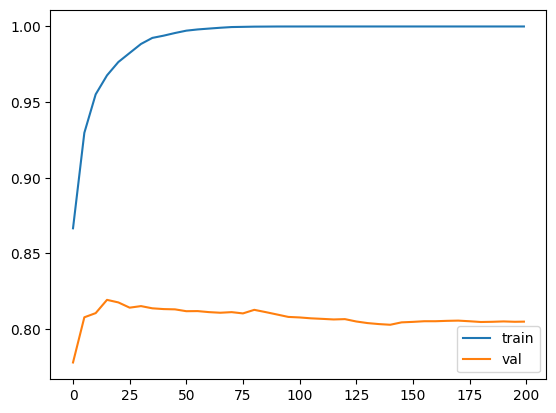

In [280]:
plt.plot(df_scores.num_iter,df_scores.train_auc,label='train')
plt.plot(df_scores.num_iter,df_scores.val_auc,label='val')
plt.legend()


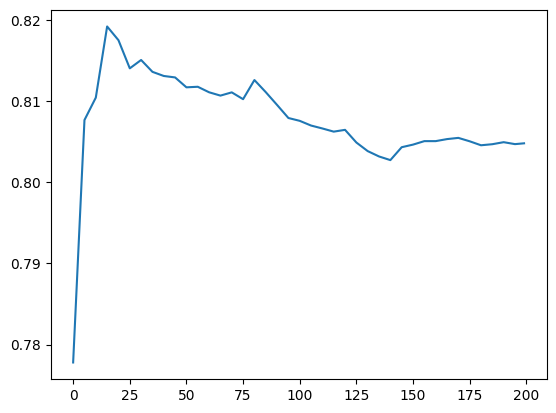

In [281]:
plt.plot(df_scores.num_iter,df_scores.val_auc,label='val')

## 6.8 XGBoost parameter tuning
Turning the following parameters:
  * eta
  * max_depth
  * min_child_weight


In [314]:
scores={}

In [325]:
%%capture output
xgb_params = {
    'eta':0.05,
    'max_depth':6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'nthread':12,
    'eval_metric':'auc',
    'seed':1,
    'verbosity':1,
} 

model = xgb.train(xgb_params,dtrain,verbose_eval=5,
                    num_boost_round=200,evals=watchlist )

<h3>here we are createing the array of dictionary 'score' to find the which 'eta' parameter is work well</h3>

In [326]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores

{'eta=1':     num_iter  train_auc  val_auc
 0          0    0.86653  0.77780
 1          5    0.96126  0.78570
 2         10    0.98555  0.78555
 3         15    0.99523  0.78133
 4         20    0.99943  0.78316
 5         25    0.99997  0.78716
 6         30    1.00000  0.78352
 7         35    1.00000  0.78186
 8         40    1.00000  0.78439
 9         45    1.00000  0.78583
 10        50    1.00000  0.78554
 11        55    1.00000  0.78825
 12        60    1.00000  0.78864
 13        65    1.00000  0.78818
 14        70    1.00000  0.78926
 15        75    1.00000  0.78943
 16        80    1.00000  0.78903
 17        85    1.00000  0.79007
 18        90    1.00000  0.78947
 19        95    1.00000  0.78965
 20       100    1.00000  0.79035
 21       105    1.00000  0.79068
 22       110    1.00000  0.79164
 23       115    1.00000  0.79212
 24       120    1.00000  0.79140
 25       125    1.00000  0.79105
 26       130    1.00000  0.79158
 27       135    1.00000  0.79113
 28  

In [327]:
scores.keys()

dict_keys(['eta=1', 'eta=0.3', 'eta=0.1', 'eta=0.05'])

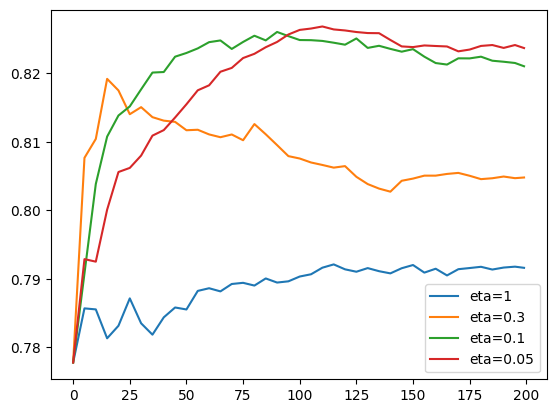

In [329]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter,df_scores.val_auc,label=key)
plt.legend()

<h3>by looking at the graph the <b>eta=0.1</b> is the perfect for this model</h3>

now we got the eta and now look for the max_depth

In [332]:
score={}

In [ ]:
%%capture output
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'nthread':12,
    'eval_metric':'auc',
    'seed':1,
    'verbosity':1,
} 

model = xgb.train(xgb_params,dtrain,verbose_eval=5,
                    num_boost_round=200,evals=watchlist )

In [ ]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
score[key] = parse_xgb_output(output)


,num_iter,train_auc,val_auc
0,0,0.91921,0.76937
1,5,0.94452,0.77615
2,10,0.96470,0.78622
3,15,0.97174,0.78457
4,20,0.97819,0.79114
5,25,0.98341,0.79807
6,30,0.98693,0.79985
7,35,0.99063,0.79963
8,40,0.99326,0.79937
9,45,0.99523,0.79913


In [340]:
score.keys()

dict_keys(['max_depth=6', 'max_depth=3', 'max_depth=10'])

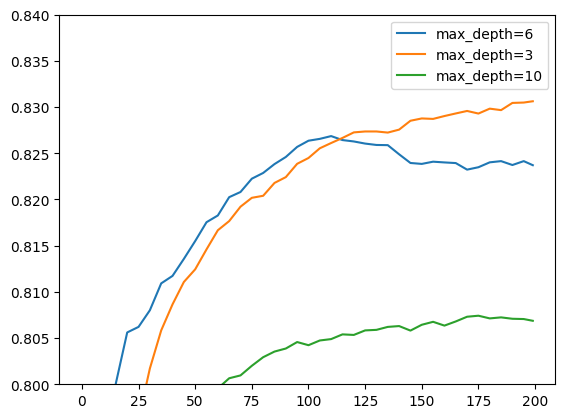

In [343]:
for key, df_scores in score.items():
    plt.plot(df_scores.num_iter,df_scores.val_auc,label=key)
plt.ylim(0.8,0.84)
plt.legend()

<h3>from the above graph the conclution is <b>max_depth = 3</b></h3>is the best 

now we go for the min_child_weight

In [344]:
scor={}

In [350]:
%%capture output
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':21,
    'objective': 'binary:logistic',
    'nthread':12,
    'eval_metric':'auc',
    'seed':1,
    'verbosity':1,
} 

model = xgb.train(xgb_params,dtrain,verbose_eval=5,
                    num_boost_round=200,evals=watchlist )

In [351]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scor[key] = parse_xgb_output(output)
scor[key]


,num_iter,train_auc,val_auc
0,0,0.76740,0.73244
1,5,0.83316,0.77778
2,10,0.84927,0.79331
3,15,0.85546,0.80192
4,20,0.86493,0.81052
5,25,0.87100,0.81565
6,30,0.87466,0.81803
7,35,0.87832,0.81967
8,40,0.88023,0.82185
9,45,0.88291,0.82456


In [354]:
scor.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=21'])

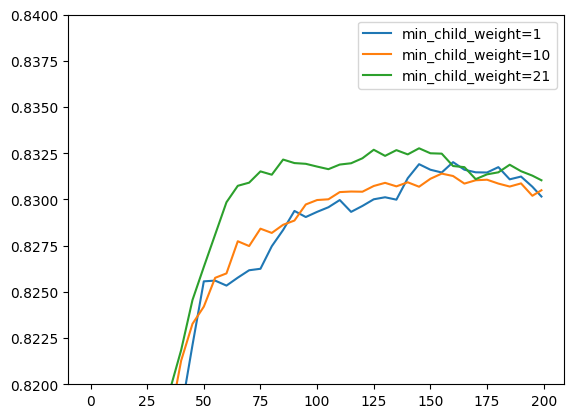

In [356]:
for key,df_scores in scor.items():
    plt.plot(df_scores.num_iter,df_scores.val_auc,label=key)
plt.ylim(0.82,0.84)
plt.legend()

here there is no much difference so we take min_child_weight=1 as it is default

In [357]:
%%capture output
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'nthread':12,
    'eval_metric':'auc',
    'seed':1,
    'verbosity':1,
} 

model = xgb.train(xgb_params,dtrain,num_boost_round=175 )

## 6.9 Selecting the final model
  * Choosing between xgboost, random forest and decision tree
  * Training the final model
  * saving the model

In [359]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=20)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [365]:
y_pred=dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)  

0.7724231672761618

In [360]:
rf = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_leaf=3,random_state=1)
rf.fit(X_train,y_train)

y_pred=rf.predict_proba(X_val)[:,1]
auc= roc_auc_score(y_val,y_pred)  

In [366]:
y_pred=rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)  

0.8238447845777529

In [362]:

xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'nthread':12,
    'eval_metric':'auc',
    'seed':1,
    'verbosity':1,
} 

model = xgb.train(xgb_params,dtrain,num_boost_round=175 )

In [368]:
y_pred=model.predict(dval)
roc_auc_score(y_val,y_pred)  

0.831425128962728

form the above auc score we know xgboost is the best model

In [372]:
df_full_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
1,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
2,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
4,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750


In [371]:
df_full_train=df_full_train.reset_index(drop=True)
df_full_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
1,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
2,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
4,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750


In [377]:
y_full_train = (df_full_train.status=='default').astype(int).values

In [379]:
del df_full_train['status']

In [385]:
dict_full_train = df_full_train.to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)


dict_test = df_test.to_dict(orient='records')
X_test = dv.transform(dict_test)

In [388]:
dfulltrain = xgb.DMatrix(X_full_train,label=y_full_train,feature_names=dv.get_feature_names_out().tolist())

dtest = xgb.DMatrix(X_test,feature_names=dv.get_feature_names_out().tolist())

In [389]:

xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'nthread':12,
    'eval_metric':'auc',
    'seed':1,
    'verbosity':1,
} 

model = xgb.train(xgb_params,dfulltrain,num_boost_round=175 )

In [390]:
y_pred = model.predict(dtest)

In [392]:
y_pred[:10]

array([0.2457571 , 0.29309607, 0.08425504, 0.20603573, 0.33663422,
       0.24645075, 0.00855018, 0.03036533, 0.2058607 , 0.23665117],
      dtype=float32)

In [393]:
roc_auc_score(y_test,y_pred)

0.8299814280826938